In [1]:
#function to test models 
import nest_asyncio
import warnings
from mb_utils.src.logging import logger

nest_asyncio.apply()
warnings.filterwarnings("ignore")

In [2]:
from mb_pytorch.version import version
version

'1.3.49'

In [3]:
from mb_pytorch.utils.yaml_reader import YAMLReader
from mb_pytorch.dataloader.loader import BaseDataset,TorchDataLoader

In [4]:
yaml_read = YAMLReader('../scripts/detection/object_detection.yaml') #load the data
yaml_data = yaml_read.read()

In [5]:
yaml_data['model']

{'model_type': 'detection',
 'model': 'faster_rcnn',
 'use_pretrained': True,
 'use_own_model': False,
 'model_path': '/home/malav/Desktop/mb_packages/mb_pytorch/models/...',
 'device': 'cpu',
 'load_model': False,
 'use_torchvision_models': True,
 'model_name': 'fasterrcnn_resnet50_fpn',
 'model_version': '50',
 'model_backbone': 'resnet',
 'model_optimizer': 'Adam',
 'model_loss': 'cross_entropy',
 'model_scheduler': 'StepLR',
 'model_pretrained': True,
 'model_epochs': 3,
 'model_num_classes': 3,
 'model_initialization': 'None',
 'model_meta_data': {'model_bbox_threshold': 0.6},
 'model_train_parameters': {'Adam': {'lr': 0.001,
   'betas': [0.9, 0.999],
   'eps': 1e-08,
   'weight_decay': 0,
   'amsgrad': False},
  'SGD': {'lr': 0.01,
   'momentum': 0.9,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False},
  'RMSprop': {'lr': 0.01,
   'alpha': 0.99,
   'eps': 1e-08,
   'weight_decay': 0,
   'momentum': 0,
   'centered': False},
  'cross_entropy': {'weight': 'None',
   'si

In [6]:
# model_init = ModelLoader(yaml_data['model'])
# model = model_init.get_model()
# model

In [7]:
train_dataset = BaseDataset(data_config=yaml_data['data']['file'], task_type=yaml_data['model']['model_type'], 
                            transform=yaml_data['transformation'],is_train=True,logger=logger)

val_dataset = BaseDataset(data_config=yaml_data['data']['file'], task_type=yaml_data['model']['model_type'],
                          transform=yaml_data['transformation'],is_train=False,logger=logger)


Sat 08:47:05,028 INF Loading data from /home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final_smaller.csv 
Sat 08:47:05,030 INF Loading DataFrame from /home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final_smaller
Sat 08:47:05,034 INF Successfully loaded DataFrame with shape (50, 5)                                                                
Sat 08:47:05,036 INF Checking duplicates for columns: ['image_path']                                                                 
Sat 08:47:05,037 INF No duplicates found                                                                                             
Sat 08:47:05,038 INF Removing unnamed columns                                                                                        
Sat 08:47:05,042 INF Loading data from /home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final_smaller.csv 
Sat 08:47:05,044 INF Loading DataFrame from /home/malav/Deskto

In [8]:

train_dataloader= TorchDataLoader(dataset=train_dataset, batch_size=yaml_data['train_params']['batch_size'],
                                  shuffle=yaml_data['train_params']['shuffle'],num_workers=yaml_data['train_params']['num_workers'])

val_dataloader= TorchDataLoader(dataset=val_dataset, batch_size=yaml_data['val_params']['batch_size'],
                                  shuffle=yaml_data['val_params']['shuffle'],num_workers=yaml_data['val_params']['num_workers'])

In [9]:
from mb_pytorch.detection.training import DetectionTrainer

2024-12-21 08:47:07.524025: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734770827.540641   34917 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734770827.545509   34917 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-21 08:47:07.562467: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
DetectionTrainer?

Init signature:
DetectionTrainer(
    config: Dict[str, Any],
    train_loader: torch.utils.data.dataloader.DataLoader = None,
    val_loader: torch.utils.data.dataloader.DataLoader = None,
    writer: Optional[Any] = None,
    logger: Optional[Any] = None,
    gradcam: Optional[Any] = None,
    gradcam_rgb: bool = False,
    device: str = 'cpu',
    use_all_cpu_cores: bool = False,
)
Docstring:      Trainer class specifically for object detection models.
Init docstring:
Initialize the detection trainer.

Args:
    config: Configuration dictionary
    scheduler: Optional learning rate scheduler
    writer: Optional tensorboard writer
    logger: Optional logger instance
    gradcam: Optional gradcam layers to visualize
    gradcam_rgb: Whether to use RGB for gradcam
    device: Device to run training on
    use_all_cpu_cores: Whether to use all CPU cores for data loading. (2 cpu cores less than max. default)
File:           ~/.local/lib/python3.11/site-packages/mb_pytorch/detection/tra

In [11]:
trainer_func = DetectionTrainer(yaml_data,train_dataloader,val_dataloader,logger=logger,
                                device='cpu',use_all_cpu_cores=True,writer=True)

Sat 08:47:10,742 INF Loading model...                                                                                                
Sat 08:47:11,209 INF Model fasterrcnn_resnet50_fpn loaded from torchvision.models.                                                   
Sat 08:47:11,212 INF Setting up training components...                                                                               
Sat 08:47:11,213 INF Loss function: cross_entropy                                                                                    
Sat 08:47:11,214 INF Optimizer: Adam                                                                                                 
Sat 08:47:11,215 INF Scheduler: StepLR                                                                                               


Setting TorchScript to use all available cores
Current number of threads for torch: 12
Number of available cores: 24
Number of threads set to: 22. Using 2 less than available cores for other tasks.


In [12]:
%tensorboard --logdir ../data/fruit_dataset/logs

UsageError: Cell magic `%%tensorboard` not found.


Sat 08:47:38,226 INF Starting training...                                                                                            
Epochs:   0%|          | 0/3 [00:00<?, ?it/s]Sat 08:47:38,230 INF Training Started                                                                                                

Training:   0%|          | 0/3 [00:00<?, ?it/s]Sat 08:48:34,551 INF Epoch 1, Batch 0: Loss=0.3475                                                                                   

Training:  33%|███▎      | 1/3 [00:56<01:52, 56.32s/it]

Epoch 1, Batch 1: Loss=1.5730



Training:  67%|██████▋   | 2/3 [01:52<00:56, 56.10s/it]

Epoch 1, Batch 2: Loss=1.2019



Training: 100%|██████████| 3/3 [02:19<00:00, 43.02s/it]
                                                       Sat 08:49:58,024 INF Epoch 1 - Train Loss: 1.0408                                                                                    

Validation:   0%|          | 0/1 [00:00<?, ?it/s]Sat 08:50:12,300 INF Epoch 1 - Batch 1 - Val Loss: 0.20636579394340515                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


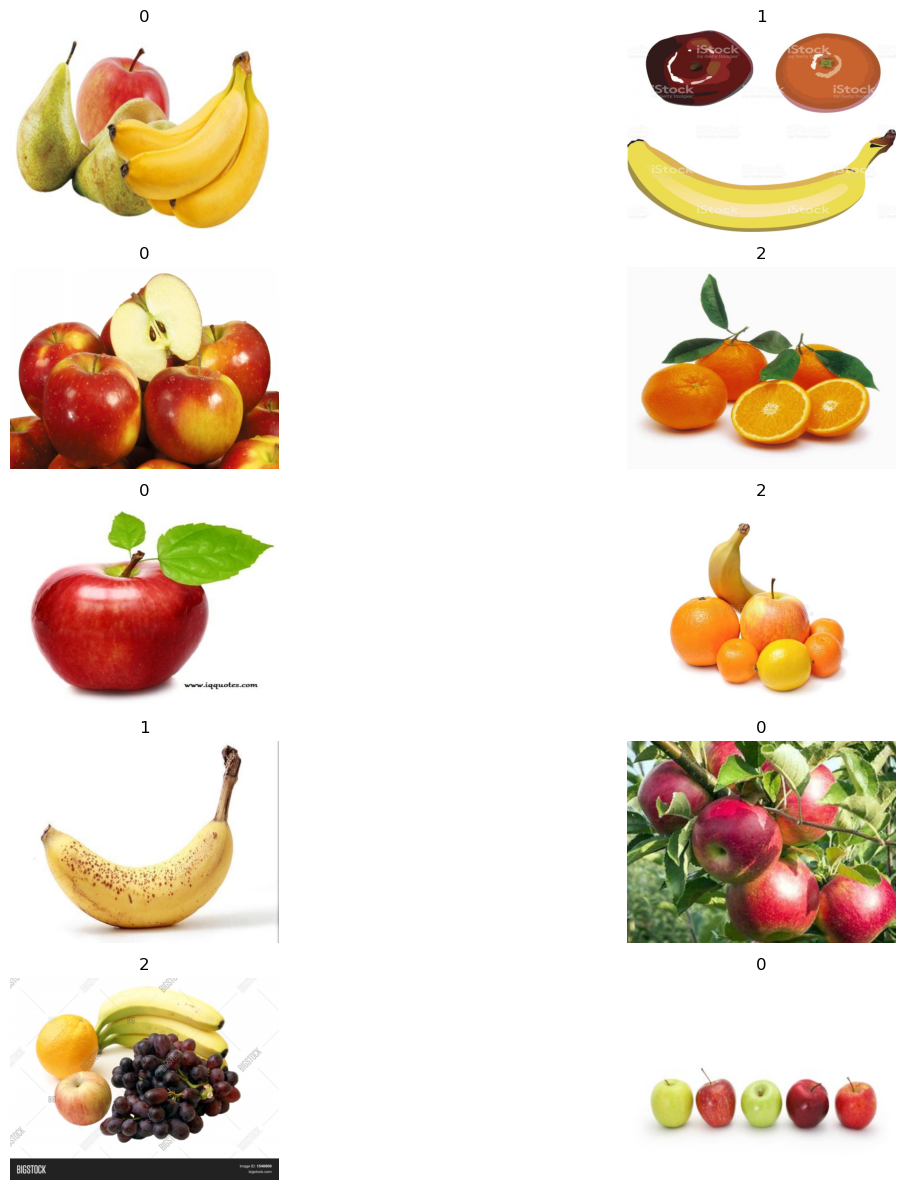


Validation: 100%|██████████| 1/1 [00:15<00:00, 15.72s/it]
                                                         Sat 08:50:13,998 INF Epoch 1 - Val Loss: 0.2064                                                                                      
Sat 08:50:17,916 INF Checkpoint saved at epoch 1                                                                                     


Epoch 1 - Train Loss: 1.0408 - Val Loss: 0.2064


Epochs:  33%|███▎      | 1/3 [02:39<05:19, 159.69s/it]Sat 08:50:17,920 INF Training Started                                                                                                

Training:   0%|          | 0/3 [00:00<?, ?it/s]Sat 08:51:13,936 INF Epoch 2, Batch 0: Loss=0.2677                                                                                   

Training:  33%|███▎      | 1/3 [00:56<01:52, 56.02s/it]

Epoch 2, Batch 1: Loss=0.1416



Training:  67%|██████▋   | 2/3 [01:50<00:54, 54.97s/it]

Epoch 2, Batch 2: Loss=0.1803



Training: 100%|██████████| 3/3 [02:17<00:00, 42.28s/it]
                                                       Sat 08:52:35,565 INF Epoch 2 - Train Loss: 0.1965                                                                                    

Validation:   0%|          | 0/1 [00:00<?, ?it/s]Sat 08:52:50,313 INF Epoch 2 - Batch 1 - Val Loss: 0.26541373133659363                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


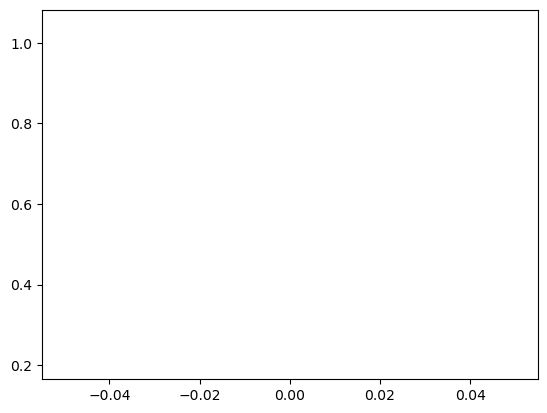

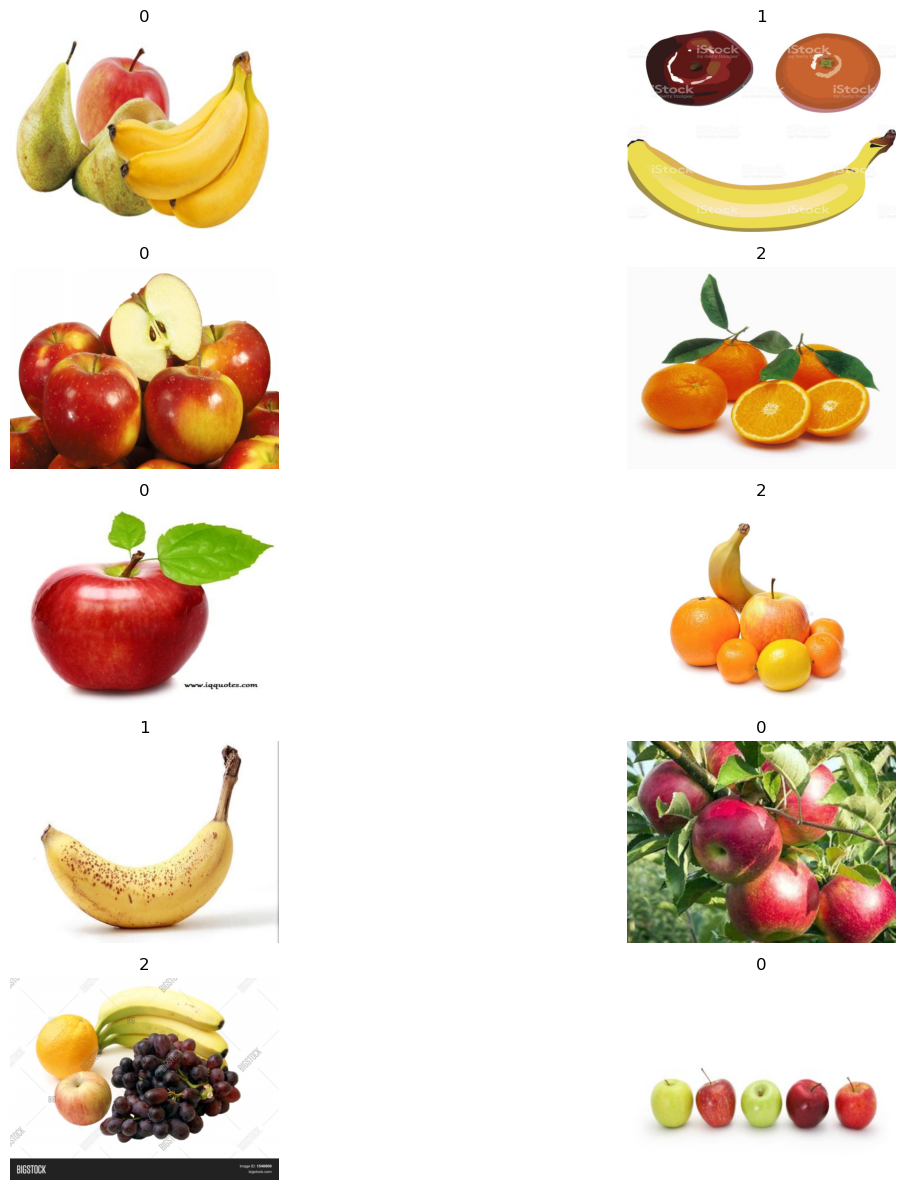


Validation: 100%|██████████| 1/1 [00:16<00:00, 15.98s/it]
                                                         Sat 08:52:51,803 INF Epoch 2 - Val Loss: 0.2654                                                                                      
Sat 08:52:55,412 INF Checkpoint saved at epoch 2                                                                                     


Epoch 2 - Train Loss: 0.1965 - Val Loss: 0.2654


Epochs:  67%|██████▋   | 2/3 [05:17<02:38, 158.40s/it]Sat 08:52:55,415 INF Training Started                                                                                                

Training:   0%|          | 0/3 [00:00<?, ?it/s]Sat 08:53:50,774 INF Epoch 3, Batch 0: Loss=0.1633                                                                                   

Training:  33%|███▎      | 1/3 [00:55<01:50, 55.36s/it]

Epoch 3, Batch 1: Loss=0.2042



Training:  67%|██████▋   | 2/3 [01:49<00:54, 54.62s/it]

Epoch 3, Batch 2: Loss=0.2663



Training: 100%|██████████| 3/3 [02:16<00:00, 41.87s/it]
                                                       Sat 08:55:11,792 INF Epoch 3 - Train Loss: 0.2113                                                                                    

Validation:   0%|          | 0/1 [00:00<?, ?it/s]Sat 08:55:25,874 INF Epoch 3 - Batch 1 - Val Loss: 0.22496262192726135                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


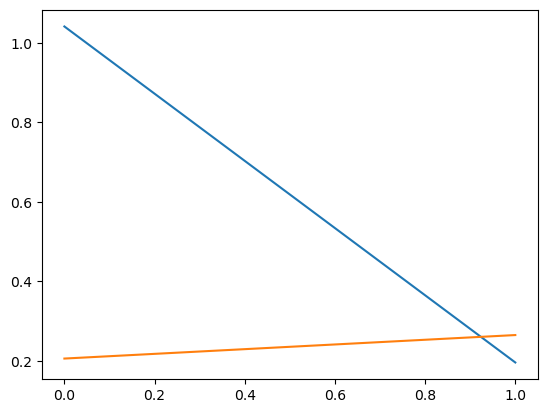

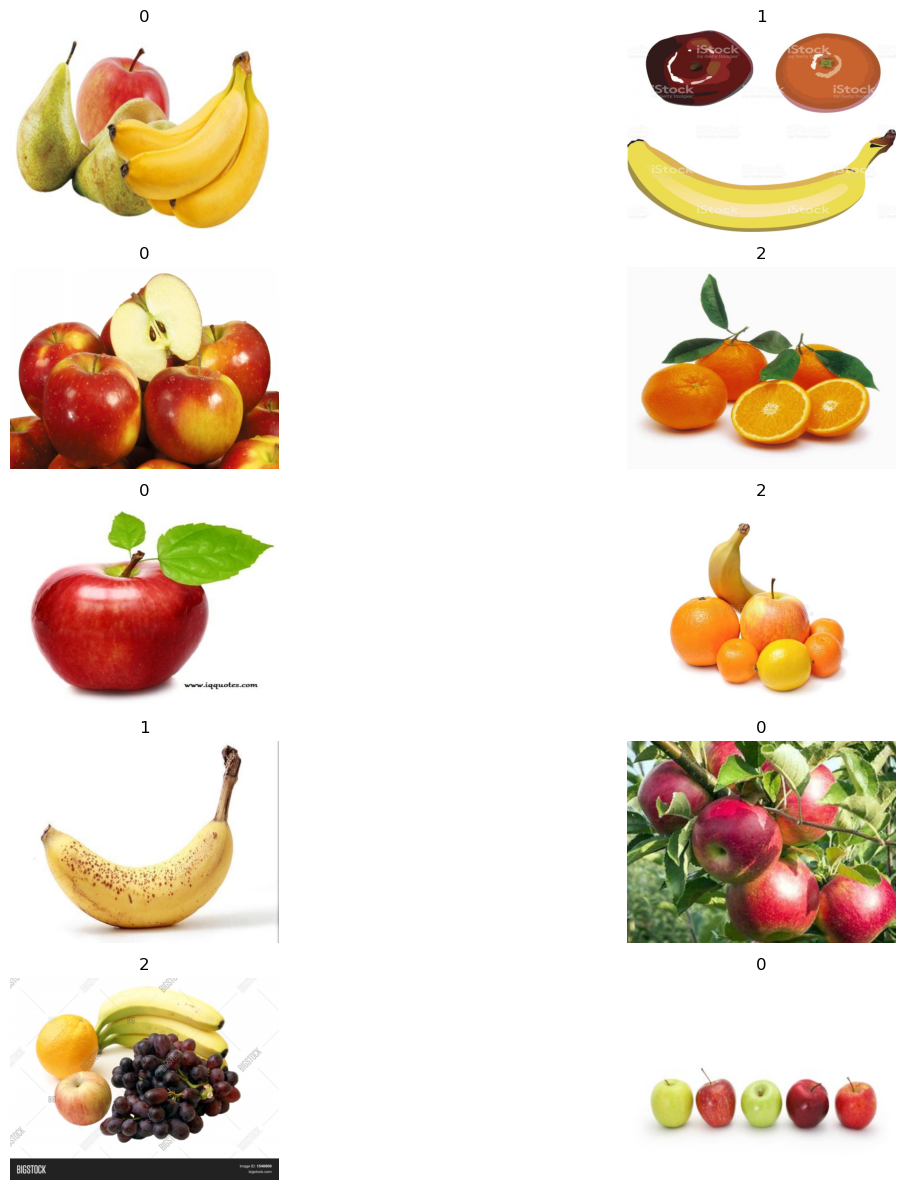


Validation: 100%|██████████| 1/1 [00:15<00:00, 15.32s/it]
                                                         Sat 08:55:27,421 INF Epoch 3 - Val Loss: 0.2250                                                                                      
Sat 08:55:30,964 INF Checkpoint saved at epoch 3                                                                                     


Epoch 3 - Train Loss: 0.2113 - Val Loss: 0.2250


Epochs: 100%|██████████| 3/3 [07:52<00:00, 157.58s/it]


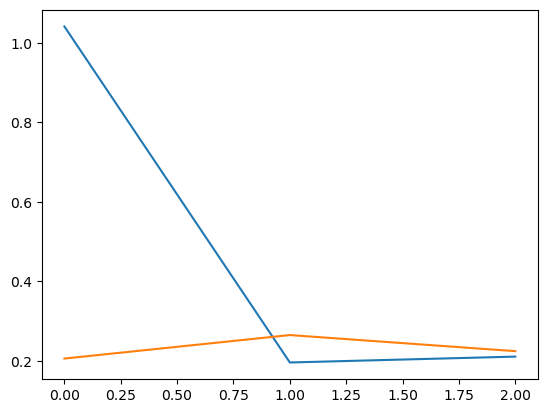

In [13]:
trainer_func.train()

In [44]:
## testing the model 

In [21]:
val_dataloader.dataset[0]['image'].shape

torch.Size([3, 600, 800])

In [23]:
trainer_func.model.eval()
trainer_func.model([val_dataloader.dataset[0]['image']])

[{'boxes': tensor([[ 20.0515, 348.0062, 486.9756, 590.2435],
          [302.7253, 269.8316, 687.2678, 586.8997],
          [154.3454, 197.4220, 546.2819, 583.8949],
          [ 12.4804, 198.0510, 304.0657, 585.4283],
          [309.6834,  46.4891, 575.3051, 546.1705],
          [501.4399, 138.9833, 767.7441, 581.2206],
          [183.3997, 154.8383, 685.6713, 468.1749],
          [ 19.9986, 155.4046, 443.5894, 468.3696],
          [406.1034,  43.5782, 671.8643, 546.1016],
          [ 39.0129,  63.1226, 541.6755, 376.0500],
          [277.4855,  62.8465, 780.4177, 377.7245],
          [213.4105,  42.6782, 479.4289, 546.1938],
          [117.2785,  40.8225, 384.0896, 545.9382],
          [158.8977,   0.0000, 550.0679, 296.2036],
          [399.2872,   0.0000, 792.1627, 296.1814],
          [ 13.3335,   0.0000, 307.6601, 424.3613]], grad_fn=<StackBackward0>),
  'labels': tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
  'scores': tensor([0.2354, 0.2314, 0.2274, 0.2184, 0.2115, 0

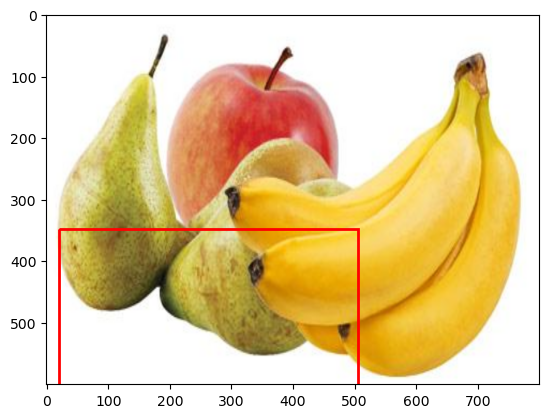

In [43]:
from matplotlib import pyplot as plt
plt.imshow(val_dataloader.dataset[0]['image'].permute(1,2,0))
ax = plt.Rectangle((20, 348), 486, 590, fill=False, edgecolor='red', linewidth=2)
plt.gca().add_patch(ax)

In [14]:
import pandas as pd
tv = pd.read_csv('../data/fruit_dataset/fruit_dataset_final.csv')

In [23]:
tv_new = tv[::6]

In [27]:
tv_new.to_csv('../data/fruit_dataset/fruit_dataset_final_smaller.csv',index=False)